# VisHiC2: CLEANtotal versus GSE11121

In [317]:
# Libraries
library(jsonlite)
library(dplyr)
library(ggplot2)
#source("https://bioconductor.org/biocLite.R")
#biocLite("GOsummaries")
library(GOsummaries)
library(RColorBrewer)
library(xtable)

## CLEANtotal data

In [318]:
# CLEANtotal data
clusters <- fromJSON("CLEANtot_clusters.dict",flatten=TRUE)
clusters <- lapply(clusters, function(x) strsplit(x, " ")[[1]])
load(file="CLEANtot_gp.RData") # gp.tot
CLEANtotal = read.table("BreastTotalENSG_ave.mat", sep="\t", header=T)

In [319]:
# Filter out terms bigger than 700
gp.tot.filt = gp.tot[gp.tot$term.size<=700,]

In [320]:
# Dense clusters in CLEANtotal
# With filtering
# First annotated clusters
first = "NODE_12306 NODE_225 NODE_682 NODE_143 NODE_13 NODE_883 NODE_681 NODE_328 NODE_5 NODE_115 NODE_17 NODE_22 NODE_690 NODE_327 NODE_882 NODE_10703 NODE_224 NODE_192 NODE_2908 NODE_870 NODE_21 NODE_10707 NODE_1083 NODE_37 NODE_12181 NODE_11763 NODE_29 NODE_524 NODE_10042 NODE_10621 NODE_12041 NODE_10156 NODE_4232 NODE_8353 NODE_12153 NODE_6319 NODE_11251 NODE_3893 NODE_10999 NODE_7324 NODE_10508 NODE_880 NODE_5665 NODE_3835 NODE_7604 NODE_11751 NODE_671 NODE_11452 NODE_11801 NODE_285 NODE_9154 NODE_8739 NODE_11679 NODE_8545 NODE_10998 NODE_11367 NODE_8544 NODE_2202 NODE_12167 NODE_8337 NODE_9814 NODE_6987 NODE_11121 NODE_11653 NODE_12245 NODE_1080"
first = strsplit(first, " ")[[1]]

# Best p-value clusters
best = "NODE_10236 NODE_3309 NODE_7794 NODE_9641 NODE_2111 NODE_12390 NODE_7324 NODE_1093 NODE_2874 NODE_940 NODE_592 NODE_780 NODE_1623 NODE_443 NODE_7652 NODE_1197 NODE_887 NODE_11810 NODE_6640 NODE_2984 NODE_10940 NODE_312 NODE_10741 NODE_4486 NODE_4216 NODE_4103 NODE_8313 NODE_9351 NODE_10553 NODE_2460 NODE_10621 NODE_543 NODE_3029 NODE_866 NODE_9709 NODE_4143 NODE_285 NODE_12041 NODE_3476 NODE_7982 NODE_718 NODE_11950 NODE_3227 NODE_9230 NODE_1212 NODE_110 NODE_2845 NODE_3329 NODE_6997 NODE_5757 NODE_2309 NODE_1926 NODE_8756 NODE_11860 NODE_8625 NODE_2270 NODE_12245 NODE_101 NODE_671 NODE_12398 NODE_4584 NODE_6407 NODE_1529 NODE_3815 NODE_9870 NODE_890 NODE_12237 NODE_8544 NODE_2590 NODE_3916 NODE_447 NODE_540 NODE_8763 NODE_11119 NODE_12230 NODE_3359 NODE_1671 NODE_6093 NODE_10322 NODE_1989 NODE_5548 NODE_11679 NODE_2153 NODE_7241 NODE_444 NODE_3324 NODE_9330 NODE_5425 NODE_2143 NODE_4028 NODE_10998 NODE_5943 NODE_3466 NODE_8629 NODE_2377 NODE_6987 NODE_8737 NODE_8114 NODE_480 NODE_4232 NODE_7173 NODE_1272 NODE_11290 NODE_826 NODE_8557 NODE_3898 NODE_2668 NODE_422 NODE_11367 NODE_8135 NODE_4681 NODE_8628 NODE_12375 NODE_981 NODE_153 NODE_4196 NODE_828 NODE_11473 NODE_6951 NODE_233 NODE_1395 NODE_11801 NODE_12183 NODE_1089 NODE_7992 NODE_8739 NODE_1808 NODE_5436 NODE_4682 NODE_1194 NODE_167 NODE_3326 NODE_4526 NODE_3696 NODE_11211 NODE_8568 NODE_878 NODE_1080 NODE_5665 NODE_997 NODE_789 NODE_2096 NODE_6685 NODE_1718 NODE_1241 NODE_1788 NODE_264 NODE_11653 NODE_2202 NODE_2891 NODE_1530 NODE_1351 NODE_3366 NODE_2888 NODE_7886 NODE_1017 NODE_1909 NODE_11121 NODE_5281 NODE_5348 NODE_7632 NODE_10841 NODE_8337 NODE_3906 NODE_8895 NODE_9814 NODE_11254 NODE_3367"
best = strsplit(best, " ")[[1]]

# F1 clusters
F1 = "NODE_7467 NODE_9876 NODE_9419 NODE_8611 NODE_3906 NODE_8895 NODE_9814 NODE_11254 NODE_9552 NODE_3367 NODE_8540 NODE_11497 NODE_11522 NODE_8400 NODE_9068 NODE_11810 NODE_10181 NODE_4216 NODE_12983 NODE_8791 NODE_10286 NODE_6450 NODE_1322 NODE_4449 NODE_4486 NODE_10114 NODE_7982 NODE_718 NODE_9959 NODE_3227 NODE_2625 NODE_5757 NODE_8313 NODE_5839 NODE_3819 NODE_11860 NODE_8021 NODE_8625 NODE_8988 NODE_9010 NODE_11008 NODE_3957 NODE_8053 NODE_11011 NODE_11056 NODE_2950 NODE_3071 NODE_9563 NODE_7123 NODE_12398 NODE_4584 NODE_8821 NODE_11893 NODE_4831 NODE_4885 NODE_10066 NODE_8493 NODE_2590 NODE_6407 NODE_1465 NODE_12826 NODE_1452 NODE_2460 NODE_7324 NODE_1671 NODE_11950 NODE_3629 NODE_6110 NODE_5032 NODE_5341 NODE_11119 NODE_12237 NODE_8544 NODE_4355 NODE_10347 NODE_11873 NODE_9645 NODE_2153 NODE_8495 NODE_6051 NODE_540 NODE_4143 NODE_3288 NODE_10305 NODE_8168 NODE_3111 NODE_13141 NODE_10010 NODE_10248 NODE_3324 NODE_9330 NODE_5425 NODE_8018 NODE_9063 NODE_5253 NODE_3466 NODE_12059 NODE_12355 NODE_3359 NODE_11290 NODE_7173 NODE_1272 NODE_285 NODE_13336 NODE_8737 NODE_4267 NODE_1954 NODE_5006 NODE_7718 NODE_543 NODE_1623 NODE_10549 NODE_3287 NODE_4260 NODE_6213 NODE_6141 NODE_9937 NODE_8564 NODE_11141 NODE_1395 NODE_7992 NODE_9934 NODE_5751 NODE_7041 NODE_6599 NODE_6951 NODE_5727 NODE_5548 NODE_153 NODE_12547 NODE_3374 NODE_13014 NODE_8114 NODE_480 NODE_9230 NODE_13200 NODE_11367 NODE_4668 NODE_11608 NODE_8568 NODE_11839 NODE_5665 NODE_12598 NODE_8658 NODE_11226 NODE_12267 NODE_7241 NODE_233 NODE_10187 NODE_6547 NODE_10341 NODE_10178 NODE_1909 NODE_4468 NODE_3820 NODE_11237 NODE_11506 NODE_167 NODE_5828 NODE_3645 NODE_10609 NODE_4181 NODE_12543 NODE_9783 NODE_1782 NODE_4232 NODE_4327 NODE_1529 NODE_2280 NODE_6036 NODE_789 NODE_1351 NODE_1048 NODE_12550 NODE_4590 NODE_8629 NODE_2377 NODE_4499 NODE_890 NODE_4883 NODE_10841 NODE_6371 NODE_997 NODE_10290 NODE_12845 NODE_6319 NODE_13258 NODE_3356 NODE_12919 NODE_5713 NODE_5212 NODE_6159 NODE_3696 NODE_3927 NODE_2994 NODE_10238 NODE_671 NODE_9351 NODE_137 NODE_12764 NODE_10402 NODE_3136 NODE_8206 NODE_11836 NODE_9438 NODE_9888 NODE_10811 NODE_6640 NODE_4118 NODE_4715 NODE_4682 NODE_1194 NODE_12375 NODE_7499 NODE_8011 NODE_8628 NODE_5348 NODE_3387 NODE_11106 NODE_8082 NODE_10526 NODE_3610 NODE_10783 NODE_10880 NODE_10244 NODE_8557 NODE_1241 NODE_4430 NODE_264 NODE_9274 NODE_101 NODE_4083 NODE_5893 NODE_828 NODE_4431 NODE_13263 NODE_3730 NODE_2105 NODE_11704 NODE_4409 NODE_1464 NODE_6234 NODE_9647 NODE_10672 NODE_2435 NODE_2733 NODE_6546 NODE_1926 NODE_2616 NODE_9278 NODE_11653 NODE_12245 NODE_13045 NODE_9851 NODE_7378 NODE_5484 NODE_6131 NODE_13165 NODE_6936 NODE_10536 NODE_9420 NODE_1089 NODE_6379 NODE_6723 NODE_6685 NODE_10998 NODE_9440 NODE_2406 NODE_4743 NODE_6059 NODE_8800 NODE_1080 NODE_6249 NODE_7886 NODE_7823 NODE_12468 NODE_6206 NODE_1808 NODE_1354 NODE_5462 NODE_11473 NODE_6987 NODE_10741 NODE_11801 NODE_5608 NODE_13011 NODE_8337 NODE_1799 NODE_447 NODE_422 NODE_4432 NODE_981 NODE_4153 NODE_878 NODE_12183 NODE_8157 NODE_3635 NODE_7632 NODE_2096 NODE_11807 NODE_6358 NODE_4373 NODE_12868 NODE_1788 NODE_1017 NODE_1989 NODE_5281 NODE_11679 NODE_4196 NODE_5436 NODE_4681 NODE_2888 NODE_3366 NODE_1530 NODE_5124 NODE_8169 NODE_2202 NODE_1718 NODE_6461 NODE_3923 NODE_11121 NODE_2071 NODE_8739 NODE_826 NODE_3581 NODE_2891 NODE_10782"
F1 = strsplit(F1, " ")[[1]]

## GSE11121 data

Converted the 2579 probe IDs to ENSEMBL IDs using gconvert. 2471 probes did not have ENSEMBL ID. They published 11 clusters they selected by visual inspection from heatmap and dendrogram (Basal-like, Cellular Immunsystem (T-cell), Humoral Immunsystem (B-cell), Interferon, Proliferation, Luminal (ER), Chr17 (ERBB2), Stromal, Normal-like, Jun-Fos, Transcription), leftover genes were classified as Unclassified. 

In [321]:
load(file="GSE11121.RData") # GSE11121
# Remove NA rows
GSE11121_na = GSE11121[complete.cases(GSE11121),]
cluster_types = unique(GSE11121$Class)
cluster_types

[1] Cellular Immunsystem Basal                Unclassified        
 [4] Stromal              Normal like          Jun - Fos           
 [7] Proliferation        Transcription        Chr 17              
[10] Estrogen receptor    Interferon           Humoral Immunsystem 
13 Levels: Basal Classification Cellular Immunsystem ... Transcription

In [322]:
dim(GSE11121)
dim(GSE11121[GSE11121$Class=="Unclassified",])

[1] 2579    6

[1] 1198    6

As GSE11121 is one of the datasets in the CLEAN dataset, we compare the results against our CLEANtotal clusters in order to see if the manual selection is needed. Also, keep in mind that we will look the clusters from the whole data not from DEGs. 1963 genes out of 2471 are in CLEANtotal data.  

The published marker genes for the classes (shown in table below). IGHM is the only marker that is not in CLEANtotal data. 

In [323]:
markers = data.frame(class=c("Basal", "Cellular Immunsystem", "Humoral Immunsystem", "Interferon", "Proliferation", "Estrogen receptor", "Chr 17", "Stromal", "Normal like", "Jun - Fos", "Transcription"), 
                     markers=c("KRT5, KRT17", "TRA@, TRB@, TRD@, CD8A", "IGHM, IGHG, IGKC", "IFI27, IFI35, IFIT1", "CCNB2, UBE2C, STK6, MKI67", "ESR1, MAPT, PGR, SCUBE2", "ERBB2, GRB7", "COL1A1, COL5A1, COL6A1", "FABP4, PPARG", "JUN, FOS", " "))
markers

class,markers
Basal,"KRT5, KRT17"
Cellular Immunsystem,"TRA@, TRB@, TRD@, CD8A"
Humoral Immunsystem,"IGHM, IGHG, IGKC"
Interferon,"IFI27, IFI35, IFIT1"
Proliferation,"CCNB2, UBE2C, STK6, MKI67"
Estrogen receptor,"ESR1, MAPT, PGR, SCUBE2"
Chr 17,"ERBB2, GRB7"
Stromal,"COL1A1, COL5A1, COL6A1"
Normal like,"FABP4, PPARG"
Jun - Fos,"JUN, FOS"


In [324]:
marks = c("KRT5, KRT17", "TRA@, TRB@, TRD@, CD8A", "IGHM, IGHG, IGKC", "IFI27, IFI35, IFIT1", "CCNB2, UBE2C, STK6, MKI67", "ESR1, MAPT, PGR, SCUBE2", "ERBB2, GRB7", "COL1A1, COL5A1, COL6A1", "FABP4, PPARG", "JUN, FOS")
marks = unlist(lapply(marks, function(x)strsplit(x, ", ")))
marks = GSE11121_na[GSE11121_na$Symbol %in% marks, ] 
marks[!(marks$target %in% CLEANtotal$target),] 

,Probe,Class,Symbol,Loc,Title,target
1504,211637_x_at,Humoral Immunsystem,IGHM,Chr:14q32.33,immunoglobulin heavy constant mu,ENSG00000211970
1980,216491_x_at,Humoral Immunsystem,IGHM,Chr:14q32.33,immunoglobulin heavy constant mu,ENSG00000211970


## Comparison

The probes that are not in CLEANtotal data.

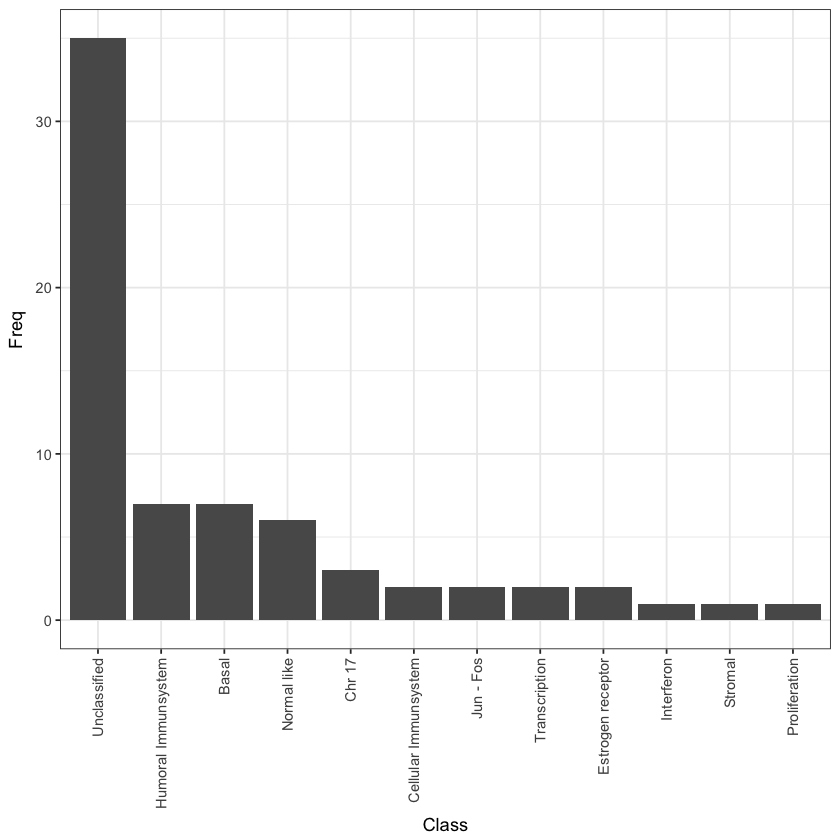

In [325]:
#length(intersect(GSE11121$target, CLEANtotal$target))
difference = table(GSE11121_na[GSE11121_na$target %in% setdiff(GSE11121_na$target, CLEANtotal$target),][["Class"]])
difference = as.data.frame(difference)
difference = difference[difference$Var1!="Classification",]
difference$Var1 = factor(difference$Var1, levels = c("Unclassified", "Humoral Immunsystem",'Basal', 'Normal like','Chr 17','Cellular Immunsystem', 'Jun - Fos', 'Transcription',"Estrogen receptor", 'Interferon',"Stromal", 'Proliferation'))
ggplot(difference, aes(x=Var1, y=Freq)) + geom_bar(stat="identity") + theme_bw() + theme(axis.text.x=element_text(angle=90,hjust=1, vjust=0.5)) + xlab("Class")

### Finding clusters

We look for the clusters from CLEANtotal Best clusters by looking for the marker genes of corresponding class from the dense clusters and take these as candidate clusters.

In [326]:
# FInd biggest overlaping clusters in dense clusters
GSEclusters = list()
# Find clusters
for(cl in cluster_types){
  GSEclusters[[cl]] = GSE11121_na[GSE11121_na$Class==cl,"target"]
}

res = data.frame()
for(cl in names(GSEclusters)){
  olaps = lapply(clusters[best], function(x) length(intersect(GSEclusters[[cl]], x)))
  olaps = olaps[olaps>0]
  idx = which.max(olaps)
  res[cl,"cl"] = names(idx)
  res[cl, "size"] = length(GSEclusters[[cl]])
  res[cl, "overlap"] = olaps[[idx]]
  res[cl, "prop"] = olaps[[idx]]/length(GSEclusters[[cl]])
}

candidates = data.frame()
for(cl in best){
    for(m in unique(marks$target)){
        if(m %in% clusters[[cl]]){
            candidates[m, "CLEANcluster"] = cl
            candidates[m, "Cluster.size"] = length(clusters[[cl]])
            candidates[m, "Symbol"] = marks[marks$target==m, ][["Symbol"]][1]
            candidates[m, "Class"] = marks[marks$target==m, ][["Class"]][1]
            candidates[m, "Class.size"] = dim(GSE11121_na[GSE11121_na$Class==candidates[m, "Class"],])[1]
            candidates[m, "Overlap"] = length(intersect(GSE11121_na[GSE11121_na$Class==candidates[m, "Class"],][["target"]], clusters[[cl]]))
        }
    }
}

#candidates[["Overlap"]] = res[candidates$Class,"overlap"]
candidates[["Perc"]] = candidates$Overlap/candidates$'Class.size' 
candidates[["ENSG"]] = row.names(candidates)
row.names(candidates) = NULL 
transcr = GSE11121_na[GSE11121_na$Class=="Transcription", ][["target"]]
pr = length(intersect(transcr, clusters[["NODE_443"]]))/length(transcr)
tr = data.frame("CLEANcluster"="NODE_443", "Cluster.size"=length(clusters[["NODE_443"]]), "Symbol"=" ", "Class"="Transcription", "Class.size"=length(transcr), "Overlap"=length(intersect(transcr, clusters[["NODE_443"]])), "Perc" = pr, "ENSG"=" ")
candidates = rbind(candidates, tr)

In [327]:
candidates = candidates[,c("Symbol", "ENSG", "CLEANcluster", "Cluster.size", "Class", "Class.size", "Overlap", "Perc")]

In [328]:
candidates = candidates %>% arrange(Class)
candidates
#print(xtable(candidates, type="latex"))

Symbol,ENSG,CLEANcluster,Cluster.size,Class,Class.size,Overlap,Perc
KRT5,ENSG00000186081,NODE_2984,119,Basal,226,60,0.26548673
KRT17,ENSG00000128422,NODE_2984,119,Basal,226,60,0.26548673
CD8A,ENSG00000153563,NODE_7794,283,Cellular Immunsystem,127,54,0.42519685
TRD@,ENSG00000211829,NODE_7794,283,Cellular Immunsystem,127,54,0.42519685
TRA@,ENSG00000277734,NODE_2111,252,Cellular Immunsystem,127,48,0.37795276
TRB@,ENSG00000211751,NODE_2111,252,Cellular Immunsystem,127,48,0.37795276
IGHM,ENSG00000211899,NODE_7794,283,Humoral Immunsystem,38,5,0.13157895
IGKC,ENSG00000239951,NODE_2111,252,Humoral Immunsystem,38,19,0.50000000
IGKC,ENSG00000242766,NODE_2111,252,Humoral Immunsystem,38,19,0.50000000
IGHM,ENSG00000211949,NODE_2111,252,Humoral Immunsystem,38,19,0.50000000


Where GSE11121 notes CCNE1 as Unclassified, in VisHiC2, CCNE1 (ENSG00000105173) is in the Proliferation cluster and it has been noted also as a marker gene.

In [329]:
GSE11121_na[GSE11121_na$target=="ENSG00000105173",]

,Probe,Class,Symbol,Loc,Title,target
1724,213523_at,Unclassified,CCNE1,Chr:19q12,cyclin E1,ENSG00000105173


In [235]:
GSE11121_na[GSE11121_na$Symbol=="BCL2",]

,Probe,Class,Symbol,Loc,Title,target
372,203685_at,Estrogen receptor,BCL2,Chr:18q21.3,B-cell CLL/lymphoma 2,ENSG00000171791


In [239]:
GSE11121_na[GSE11121_na$Symbol=="IDH2",]

,Probe,Class,Symbol,Loc,Title,target
1365,210046_s_at,Unclassified,IDH2,Chr:15q26.1,"isocitrate dehydrogenase 2 (NADP+), mitochondrial",ENSG00000182054


In [303]:
GSE11121_na[GSE11121_na$Symbol=="PLK1",]

,Probe,Class,Symbol,Loc,Title,target
NA,NA,NA,NA,NA,NA,NA


In [304]:
for(cl in names(clusters)){if("ENSG00000166851" %in% clusters[[cl]] & cl %in% best){print(cl)}}

[1] "NODE_10236"


### Comparing functions

What are the describing functions in the CLEANtotal results?

In [330]:
gp.tot.filt %>% filter(query.number %in% candidates$CLEANcluster) %>% select(query.number, term.id, term.name, p.value, F1, term.size, size) -> comp_clusters

In [331]:
prolif = GSE11121_na[GSE11121_na$Class=="Proliferation", ][["target"]]
stromal = GSE11121_na[GSE11121_na$Class=="Stromal", ][["target"]]
normal = GSE11121_na[GSE11121_na$Class=="Normal like", ][["target"]]
cellular = GSE11121_na[GSE11121_na$Class=="Cellular Immunsystem", ][["target"]]
humoral = GSE11121_na[GSE11121_na$Class=="Humoral Immunsystem", ][["target"]]
interferon = GSE11121_na[GSE11121_na$Class=="Interferon", ][["target"]]
junfos = GSE11121_na[GSE11121_na$Class=="Jun - Fos", ][["target"]]
basal = GSE11121_na[GSE11121_na$Class=="Basal", ][["target"]]
er = GSE11121_na[GSE11121_na$Class=="Estrogen receptor", ][["target"]]
chr17 = GSE11121_na[GSE11121_na$Class=="Chr 17", ][["target"]]
transcr = GSE11121_na[GSE11121_na$Class=="Transcription", ][["target"]]

gl = list(Proliferation = list(clusters[["NODE_10236"]], prolif), 
          Stromal = list(clusters[["NODE_9641"]], stromal), 
        Normal1 = list(clusters[["NODE_1093"]], normal),
          Normal2 = list(clusters[["NODE_887"]], normal),
         "Cellular Immunsystem1" = list(clusters[["NODE_7794"]], cellular),
         "Cellular Immunsystem2" = list(clusters[["NODE_2111"]], cellular),
          "Humoral Immunsystem1" = list(clusters[["NODE_7794"]], humoral),
         "Humoral Immunsystem2" = list(clusters[["NODE_2111"]], humoral),
          Interferon = list(clusters[["NODE_2111"]], interferon)
         )
gl1 = list("Jun-Fos" = list(clusters[["NODE_1093"]], junfos),
         Basal = list(clusters[["NODE_2984"]], basal),
         "Estrogen receptor" = list(clusters[["NODE_9709"]], er),
         "Chr 17" = list(clusters[["NODE_4526"]], chr17), 
         Transcription = list(clusters[["NODE_443"]], transcr))

gl2 = list(Proliferation = list(clusters[["NODE_10236"]], prolif), 
          Stromal = list(clusters[["NODE_9641"]], stromal), 
        Normal1 = list(clusters[["NODE_1093"]], normal),
          Normal2 = list(clusters[["NODE_887"]], normal),
         "Cellular Immunsystem" = list(clusters[["NODE_7794"]], cellular),
         "Humoral Immunsystem" = list(clusters[["NODE_2111"]], humoral),
          Interferon = list(clusters[["NODE_2111"]], interferon)
         )
gl3 = list("Jun-Fos" = list(clusters[["NODE_1093"]], junfos),
         Basal = list(clusters[["NODE_2984"]], basal),
         "Estrogen receptor" = list(clusters[["NODE_9709"]], er),
         "Chr 17" = list(clusters[["NODE_4526"]], chr17),
          Transcription = list(clusters[["NODE_443"]], transcr))
gs = gosummaries(gl, go_branches = c("BP", "MF", "CC"), ordered_query = FALSE, min_set_size = 5, max_set_size=700, max_p_value = 0.05, exclude_iea = T)
gs1 = gosummaries(gl1, go_branches = c("BP", "MF", "CC"), ordered_query = FALSE, min_set_size = 5, max_set_size=700, max_p_value = 0.05, exclude_iea = T)
gs2 = gosummaries(gl2, go_branches = c("BP", "MF", "CC"), ordered_query = FALSE, min_set_size = 5, max_set_siz=700, max_p_value = 0.05, exclude_iea = T)
gs3 = gosummaries(gl3, go_branches = c("BP", "MF", "CC"), ordered_query = FALSE, min_set_size = 5, max_set_siz=700, max_p_value = 0.05, exclude_iea = T)


In [333]:
darkcols <- brewer.pal(8, "Dark2")
cols = sample(darkcols, 2)
cust = function(p, par){
         p = p + scale_fill_manual(values=cols)
 return(p)
}
suppressMessages(plot(gs, fontsize=8, filename = "GSE11121_comparison1.pdf", panel_customize = cust))
suppressMessages(plot(gs1, fontsize=8, filename = "GSE11121_comparison11.pdf", panel_customize = cust))

In [334]:
suppressMessages(plot(gs2, fontsize=8, filename = "GSE11121_comparison2.pdf", panel_customize = cust))
suppressMessages(plot(gs3, fontsize=8, filename = "GSE11121_comparison22.pdf", panel_customize = cust))

## Correpsonding clusters

In [233]:
c = unique(candidates[,c("Class","Class size", "CLEANcluster", "Cluster size", "Overlap", "Perc")])
row.names(c) = NULL
c

Class,Class size,CLEANcluster,Cluster size,Overlap,Perc
Proliferation,97,NODE_10236,168,77,0.7938144
Cellular Immunsystem,127,NODE_7794,283,54,0.4251969
Humoral Immunsystem,38,NODE_7794,283,5,0.1315789
Stromal,169,NODE_9641,106,46,0.2721893
Interferon,36,NODE_2111,252,30,0.8333333
Cellular Immunsystem,127,NODE_2111,252,48,0.3779528
Humoral Immunsystem,38,NODE_2111,252,19,0.5000000
Jun - Fos,56,NODE_1093,717,13,0.2321429
Normal like,281,NODE_1093,717,147,0.5231317
Normal like,281,NODE_887,160,29,0.1032028


## Functions that define the clusters in VisHiC2

The functions larger than 700 genes are excluded.

In [298]:
gp.tot %>% select(query.number, domain, term.id, term.name, p.value, log10, term.size, overlap.size, size) %>% filter(query.number %in% best, term.size<=700) %>% group_by(query.number) %>% slice(which.max(log10)) %>% arrange(-log10)

query.number,domain,term.id,term.name,p.value,log10,term.size,overlap.size,size
NODE_10236,BP,GO:0007059,chromosome segregation,2.10e-59,58.677781,284,58,168
NODE_3309,CC,GO:0022626,cytosolic ribosome,3.06e-48,47.514279,111,25,80
NODE_7794,BP,GO:0046649,lymphocyte activation,2.28e-46,45.642065,459,69,283
NODE_9641,BP,GO:0030198,extracellular matrix organization,3.23e-46,45.490797,244,41,106
NODE_2111,BP,GO:0043207,response to external biotic stimulus,1.79e-40,39.747147,563,66,252
NODE_12390,MF,GO:0004930,G-protein coupled receptor activity,5.37e-30,29.270026,357,77,900
NODE_7324,CC,GO:0044449,contractile fiber part,1.26e-22,21.899629,129,13,16
NODE_1093,BP,GO:0072359,circulatory system development,1.21e-21,20.917215,568,81,717
NODE_2874,CC,GO:0005743,mitochondrial inner membrane,1.02e-19,18.991400,384,53,509
NODE_940,BP,GO:0034470,ncRNA processing,1.24e-14,13.906578,342,27,177
